In [41]:
import networkx
from collections import Counter
import matplotlib.pyplot as plt
import math

## Using the Wiki-Vote network

In [42]:
fp = open(r'Wiki-Vote.txt', 'r')
text = fp.read()
list_lines = text.split('\n')
del list_lines[0:4]
# print(list_lines)
list_all_nd = []
dict_edges = {}
for a in list_lines:
    b = a.split()
    list_all_nd.append(b[0])
    list_all_nd.append(b[1])
    edge_nodes = (b[0], b[1])
    dict_edges[edge_nodes] = 1
list_nodes = list(set(list_all_nd))
count_nodes = len(list_nodes)

## Finding no. of nodes and edges in the network

In [43]:
count_edges = len(list_lines)
print(f"The no. of edges in Wiki-Vote graph = {count_edges}")
print(f"The no. of nodes in Wiki-Vote graph = {count_nodes}")
adjacency_matrix = [[0 for c in range(count_nodes)] for d in range(count_nodes)]

The no. of edges in Wiki-Vote graph = 103689
The no. of nodes in Wiki-Vote graph = 7115


## Preparing the adjacency matrix of the network

In [44]:
#Preparing the adjacency matrix by storing 1 for edges in the graph and 0 when edge not there
#betweeen the nodes
for e in range(len(list_nodes)):
    src_node = list_nodes[e]
    for f in range(len(list_nodes)):
        dest_node = list_nodes[f]
        curr_edg = (src_node, dest_node)
        if dict_edges.get(curr_edg) is not None:
            adjacency_matrix[e][f] = 1


## Finding the average indegree of network

In [45]:
# print(list_nodes)
#Finding the average indegree
sum_indegree = 0
list_pairs_indegree = []
dict_indegree = {}
for g in range(count_nodes):
    curr_indegree = 0
    node_curr = list_nodes[g]
    for h in range(count_nodes):
        if adjacency_matrix[h][g] == 1:
            curr_indegree += 1
    
    list_pairs_indegree.append([node_curr, curr_indegree])
    dict_indegree[node_curr] = curr_indegree
    sum_indegree += curr_indegree

average_indegree = sum_indegree / count_nodes
print(f"The average indegree for wiki-vote graph = {average_indegree}")


The average indegree for wiki-vote graph = 14.573295853829936


## Finding the average outdegree of the network

In [46]:
#Finding the average outdegree
sum_outdegree = 0
list_pairs_outdegree = []
dict_outdegree = {}
for i in range(count_nodes):
    curr_outdegree = 0
    node_curr = list_nodes[i]
    for j in range(count_nodes):
        if adjacency_matrix[i][j] == 1:
            curr_outdegree += 1
    
    list_pairs_outdegree.append([node_curr, curr_outdegree])
    dict_outdegree[node_curr] = curr_outdegree
    sum_outdegree += curr_outdegree

average_outdegree = sum_outdegree / count_nodes
print(f"The average outdegree for Wiki-Vote graph is = {average_outdegree}")

The average outdegree for Wiki-Vote graph is = 14.573295853829936


## Finding the node with maximum indegree and node with maximum outdegree

In [47]:
#Now finding the node with maximum indegree
list_pairs_indegree.sort(key = lambda x:x[1], reverse = True)
print(f"The node with maximum indegree is = {list_pairs_indegree[0][0]}")

#Now finding the node with maximum outdegree
list_pairs_outdegree.sort(key = lambda x:x[1], reverse = True)
print(f"The node with maximum outdegree is = {list_pairs_outdegree[0][0]}")

The node with maximum indegree is = 4037
The node with maximum outdegree is = 2565


## Finding the density of the network

In [48]:
density_graph = count_edges / (count_nodes * (count_nodes - 1))
print(f"The density of the Wiki-Vote network is = {density_graph}")

The density of the Wiki-Vote network is = 0.0020485375110809584


## Plotting the total degree distribution of the graph

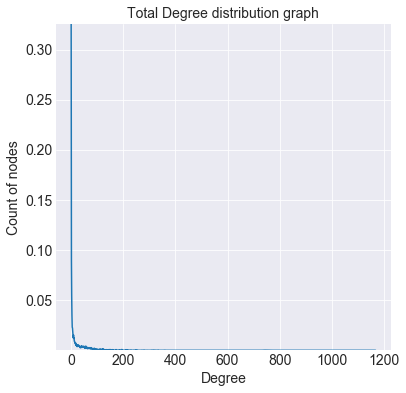

In [49]:
#Now finding the degree distribution of the network
list_all_degrees = []
list_all_indegree = []
list_all_outdegree = []
dict_degree_centrality = {}
list_pairs_centrality = []
for x in list_nodes:
    value_degree = dict_indegree[x] + dict_outdegree[x]
    dict_degree_centrality[x] = value_degree
    list_pairs_centrality.append([x, value_degree])
    list_all_degrees.append(value_degree)
    list_all_indegree.append(dict_indegree[x])
    list_all_outdegree.append(dict_indegree[x])

counter_degrees = Counter(list_all_degrees)
counter_indegree = Counter(list_all_indegree)
counter_outdegree = Counter(list_all_outdegree)

list_x_cord = []
list_y_cord = []
# for k in counter_degrees:
#     list_x_cord.append(math.log10(k))
#     list_y_cord.append(math.log10(counter_degrees[k]))

#Plotting the total degree distribution
for k in counter_degrees:
    list_x_cord.append(k)
    list_y_cord.append(counter_degrees[k] / count_nodes)

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))

zip_cord = zip(list_x_cord, list_y_cord)
list_zip_cord = list(zip_cord)
# print(list_zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
# print(sort_zip_cord)
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]

plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord))

plt.plot(list_x_cord, list_y_cord)
plt.xlabel('Degree', fontsize = 14)
plt.ylabel('Count of nodes', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Total Degree distribution graph', fontsize = 14)
plt.show()

## Plotting the indegree distribution of the graph

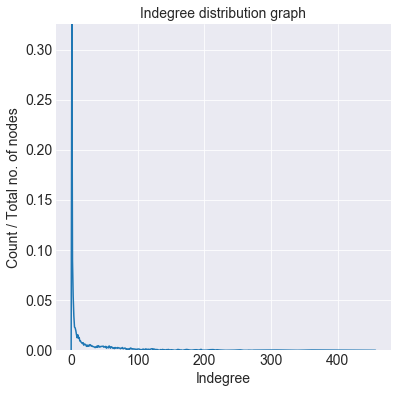

In [50]:
#Plottting the in-degree distribution
list_x_cord = []
list_y_cord = []
# for k in counter_degrees:
#     list_x_cord.append(math.log10(k))
#     list_y_cord.append(math.log10(counter_degrees[k]))
    
for k in counter_indegree:
    list_x_cord.append(k)
    list_y_cord.append(counter_degrees[k] / count_nodes)

    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))

zip_cord = zip(list_x_cord, list_y_cord)
list_zip_cord = list(zip_cord)
# print(list_zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
# print(sort_zip_cord)
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]

plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord))
plt.plot(list_x_cord, list_y_cord)
plt.xlabel('Indegree', fontsize = 14)
plt.ylabel('Count / Total no. of nodes', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Indegree distribution graph', fontsize = 14)
plt.show()

## Plotting the outdegree distribution of the graph

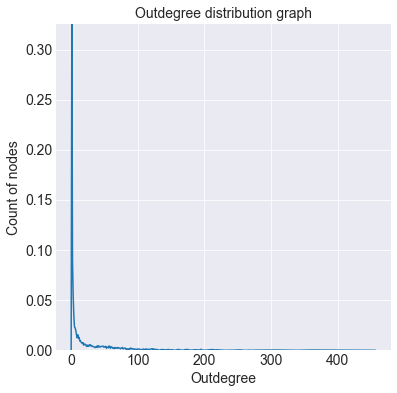

In [51]:
#Plottting the out-degree distribution
list_x_cord = []
list_y_cord = []
# for k in counter_degrees:
#     list_x_cord.append(math.log10(k))
#     list_y_cord.append(math.log10(counter_degrees[k]))
    
for k in counter_outdegree:
    list_x_cord.append(k)
    list_y_cord.append(counter_degrees[k] / count_nodes)
    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(6,6))

zip_cord = zip(list_x_cord, list_y_cord)
list_zip_cord = list(zip_cord)
# print(list_zip_cord)
sort_zip_cord = sorted(list_zip_cord, key = lambda x: x[0]) 
# print(sort_zip_cord)
list_x_cord = [w[0] for w in sort_zip_cord]
list_y_cord = [x[1] for x in sort_zip_cord]

plt.ylim(top=max(list_y_cord))  # adjust the top leaving bottom unchanged
plt.ylim(bottom=min(list_y_cord))

plt.plot(list_x_cord, list_y_cord)
plt.xlabel('Outdegree', fontsize = 14)
plt.ylabel('Count of nodes', fontsize = 14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title(label = 'Outdegree distribution graph', fontsize = 14)
plt.show()

## Finding the clustering coefficients

In [52]:
#Calculating the local clustering co-efficient of each node
#First finding the list of all neighbours of the node
dict_neighbours = {}
for l in range(len(list_nodes)):
    curr_node = list_nodes[l]
    list_ngh = []
    for m in range(len(list_nodes)):
        if adjacency_matrix[l][m] == 1 or adjacency_matrix[m][l] == 1:
            list_ngh.append(list_nodes[m])
    
    dict_neighbours[curr_node] = list(set(list_ngh))

#Now finding the clustering coefficient of each node of the graph
dict_clustering_coeff = {}
list_pairs_clust = []
sum_clust_coeff = 0
for n in range(len(list_nodes)):
    curr_node = list_nodes[n]
    neigh_list = dict_neighbours[curr_node]
    count_neighbors = len(neigh_list)
    #Generating all possible edges
    list_possib_edges = []
    for o in neigh_list:
        for p in neigh_list:
            if o != p:
                edge_made = (o, p)
                list_possib_edges.append(edge_made)
    
    #Now finding the count of edges that actually exist between neighbours
    count_edge_bw_neigh = 0
    for q in list_possib_edges:
        if dict_edges.get(q) is not None:
            count_edge_bw_neigh += 1
    
    #Clustering coeffficient value
#     print(count_neighbors)
    if count_neighbors > 1:
        value_clustering_coeff = (count_edge_bw_neigh / (count_neighbors * (count_neighbors - 1)))
    else:
        value_clustering_coeff = 0
    dict_clustering_coeff[curr_node] = value_clustering_coeff
    list_pairs_clust.append([curr_node, value_clustering_coeff])
    sum_clust_coeff += value_clustering_coeff

average_clust_coeff = sum_clust_coeff / count_nodes
print(f"The average clustering coefficient of Wiki-Vote network = {average_clust_coeff}")
list_pairs_clust.sort(key = lambda x:x[1], reverse = True)
print("\nThe top 10 nodes according to clustering coefficient value are:\n")
print("NodeId     Clustering coefficent value")
for z in range(10):
    print(f"{z+1}. {list_pairs_clust[z][0]}     {list_pairs_clust[z][1]}")

print("\nThe clustering coefficient value of all nodes is:\n")
print(dict_clustering_coeff)



The average clustering coefficient of Wiki-Vote network = 0.08053412949449605

The top 10 nodes according to clustering coefficient value are:

NodeId     Clustering coefficent value
1. 8005     1.0
2. 4854     1.0
3. 6046     1.0
4. 4849     1.0
5. 1214     1.0
6. 7383     1.0
7. 6880     1.0
8. 4799     1.0
9. 2293     1.0
10. 1782     1.0

The clustering coefficient value of all nodes is:

{'1930': 0, '230': 0.08545918367346939, '7010': 0, '2501': 0.11846153846153847, '842': 0.10459770114942529, '5696': 0.052244897959183675, '5706': 0.1, '7268': 0, '1906': 0, '4595': 0.3333333333333333, '8150': 0.0, '2646': 0.10238095238095238, '3776': 0.125, '6378': 0.0, '2335': 0, '4713': 0.12613430127041741, '948': 0.07259887005649718, '5031': 0, '4440': 0.06666666666666667, '3181': 0.0, '1535': 0.0, '6350': 0, '2309': 0.16666666666666666, '3393': 0.10378378378378378, '7779': 0.0, '7904': 0.2, '1238': 0, '1866': 0, '6836': 0, '583': 0.06923076923076923, '5523': 0, '125': 0.1416256157635468, '284'

## Finding the degree centrality values

In [53]:
#Finding the degree centrality of all nodes of the network
list_pairs_centrality.sort(key = lambda x:x[1], reverse = True)
print("The top 10 nodes according to degree centrality values along with the values are:\n")
print("NodeId     Degree centrality value")
for z in range(10):
    print(f"{z+1}. {list_pairs_centrality[z][0]}     {list_pairs_centrality[z][1]}")

print("\nThe degree centrality value of all the nodes are :\n")
print(dict_degree_centrality)

The top 10 nodes according to degree centrality values along with the values are:

NodeId     Degree centrality value
1. 2565     1167
2. 1549     832
3. 766     773
4. 11     743
5. 1166     743
6. 457     732
7. 2688     618
8. 1374     551
9. 1151     543
10. 5524     538

The degree centrality value of all the nodes are :

{'1930': 1, '230': 50, '7010': 1, '2501': 26, '842': 30, '5696': 50, '5706': 6, '7268': 1, '1906': 1, '4595': 3, '8150': 2, '2646': 111, '3776': 17, '6378': 2, '2335': 1, '4713': 58, '948': 60, '5031': 1, '4440': 6, '3181': 3, '1535': 2, '6350': 1, '2309': 3, '3393': 75, '7779': 2, '7904': 6, '1238': 1, '1866': 1, '6836': 1, '583': 26, '5523': 1, '125': 29, '284': 7, '1764': 2, '4079': 4, '6447': 26, '5610': 2, '5735': 1, '2366': 21, '4617': 1, '4881': 4, '1002': 1, '1664': 5, '4699': 1, '5915': 52, '3316': 3, '356': 61, '5896': 10, '3772': 27, '3824': 1, '7034': 1, '1902': 1, '1464': 60, '564': 32, '5895': 1, '743': 15, '6848': 14, '3469': 23, '3835': 84, '843':